## Summary

1. Define an architecture
2. Input the data
3. Train the model
4. Save the model _optional_
5. Make the model available to other modules
6. The model has to be reusable
7. Report statistics  

2-7 should be capsulated into a function.  
Input of function:
1. Data
2. Model  

Output of function:
1. Function-like model
  * Input states
  * Output observations
2. Stats

In [3]:
from EnKF_func import *
from AuxFuncs import *
from ML_func import *
from DataGenerator import *

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [23]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(20, activation=tf.nn.relu, 
                       input_shape=(40,)),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(20)
    ])

    #optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae','acc'])
    return model

In [24]:
def PrepareData(X,Y):
    
    data_size = np.shape(X)[0]

    # Shuffle the input
    order = np.argsort(np.random.random(data_size))

    train_size = round(data_size * 0.8)
    test_size = data_size - train_size

    train_data = X[order[0:train_size],:]
    train_labels = Y[order[0:train_size],:]

    test_data = X[order[train_size:],:]
    test_labels = Y[order[train_size:],:]


    ## Normalize the data
    ## Doesn't seem particularly useful
    # Test data is *not* used when calculating the mean and std.
    '''
    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)
    train_data = (train_data - mean) / std
    test_data = (test_data - mean) / std
    '''
    
    return (train_data,train_labels,
            test_data,test_labels)

In [25]:
## Used for model trained with normalized data
'''
def MakeHML(model,std,mean):
    def HML(x):
        x = x.T
        x = (x-mean)/std
        return model.predict(x).T
    return HML
'''
def MakeHML(model):
    def HML(x):
        return model.predict(x.T).T
    return HML

In [28]:
def ML_exp(RSEED,sigmaobs):
    X,Y,Y_noise = DataGen(nobs=1000,RSEED=RSEED,sigmaobs=sigmaobs)

    # Experiment with noised data

    XX = np.transpose(X)
    YY = np.transpose(Y_noise)

    train_data,train_labels,test_data,test_labels = PrepareData(XX,YY)

    model1 = build_model()

    _,b,c=ML(train_data,train_labels,test_data,test_labels,model=model1,MLDEBUG=False,MLPLOTTING=False)
    
    print('.',end='')
    
    return b,c

In [29]:
RSEED_range = range(215,226)
RSEED_num = len(RSEED_range)

sigmaobs_range = np.linspace(0,1,11)
sigmaobs_num = len(sigmaobs_range)

mae_arr = np.zeros([RSEED_num,sigmaobs_num])
acc_arr = np.zeros([RSEED_num,sigmaobs_num])

for i in range(RSEED_num):
    for j in range(sigmaobs_num):
        mae_arr[i,j],acc_arr[i,j] = ML_exp(RSEED_range[i],sigmaobs_range[j])

mae_sigmaobs = np.mean(mae_arr,axis=0)
acc_sigmaobs = np.mean(acc_arr,axis=0)

.........................................................................................................................

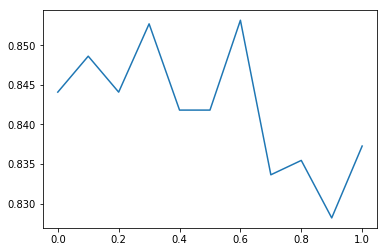

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sigmaobs_range,acc_sigmaobs)